In [1]:
import sim
import numpy as np
import sympy as sp
import pandas as pd
import time
import threading as thr
import keyboard
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
def connect(port):
# Establece la conexión a CoppeliaSim
# port debe coincidir con el puerto de conexión en VREP
# retorna el número de cliente o -1 si no puede establecer conexión
    sim.simxFinish(-1) # just in case, close all opened connections
    clientID=sim.simxStart('127.0.0.1',port,True,True,2000,5) # Conectarse
    if clientID == 0: print("conectado a", port)
    else: print("no se pudo conectar")
    return clientID

# Conectarse al servidor de VREP
# *** ejecutar cada vez que se reinicia la simulación ***
clientID = connect(19999)

retCode,Dummy=sim.simxGetObjectHandle(clientID,'Dummy',sim.simx_opmode_blocking)
retCode,joint1=sim.simxGetObjectHandle(clientID,'joint1',sim.simx_opmode_blocking)
retCode,joint2=sim.simxGetObjectHandle(clientID,'joint2',sim.simx_opmode_blocking)

retCode,muslo1=sim.simxGetObjectHandle(clientID,'muslo1',sim.simx_opmode_blocking)
retCode,rodilla1=sim.simxGetObjectHandle(clientID,'rodilla1',sim.simx_opmode_blocking)

retCode,muslo2=sim.simxGetObjectHandle(clientID,'muslo2',sim.simx_opmode_blocking)
retCode,rodilla2=sim.simxGetObjectHandle(clientID,'rodilla2',sim.simx_opmode_blocking)

retCode,muslo3=sim.simxGetObjectHandle(clientID,'muslo3',sim.simx_opmode_blocking)
retCode,rodilla3=sim.simxGetObjectHandle(clientID,'rodilla3',sim.simx_opmode_blocking)

retCode,muslo4=sim.simxGetObjectHandle(clientID,'muslo4',sim.simx_opmode_blocking)
retCode,rodilla4=sim.simxGetObjectHandle(clientID,'rodilla4',sim.simx_opmode_blocking)

conectado a 19999


In [4]:
df = pd.DataFrame(columns=['Muslo', 'Rodilla','PosX','PosY','Largo_Extremidades(m)'])
for i in range(3000):
    muslo_aleatorio = np.random.uniform(-1.5708, 1.5708)
    rodilla_aleatoria = np.random.uniform(-2.96706, 0)
    retCode = sim.simxSetJointTargetPosition(clientID, joint1, muslo_aleatorio, sim.simx_opmode_oneshot)
    retCode = sim.simxSetJointTargetPosition(clientID, joint2, rodilla_aleatoria, sim.simx_opmode_oneshot)
    res, dummy_posicion = sim.simxGetObjectPosition(clientID, Dummy, -1, sim.simx_opmode_blocking)
    x, y, z = dummy_posicion
    if x >= 0:
        df.loc[len(df)] = {'Muslo': muslo_aleatorio, 'Rodilla': rodilla_aleatoria,'PosX': x,'PosY': y,'Largo_Extremidades(m)':0.2}

#df.to_csv('datos_entrena.csv', mode='w', header=True, index=False)
df.to_csv('datos_entrena.csv', mode='a', header=False, index=False)
    

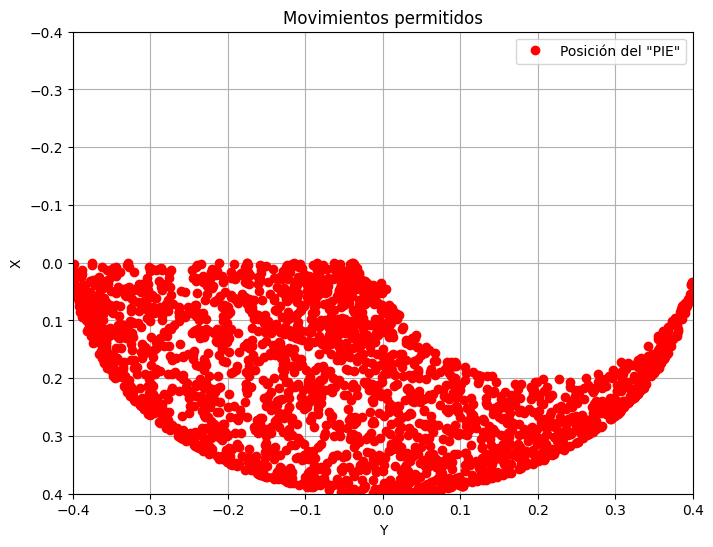

In [6]:
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
plt.plot(df['PosY'],df['PosX'], 'ro', label='Posición del "PIE"')  # Grupo 1 en rojo ('ro')
plt.xlabel('Y')  # Etiqueta eje X
plt.ylabel('X')  # Etiqueta eje Y
plt.title('Movimientos permitidos')  # Título del gráfico
plt.legend()  # Mostrar leyenda
plt.xlim(-0.4, 0.4)
plt.ylim(-0.4, 0.4)
""" plt.gca().invert_xaxis()  # Invertir eje X """
plt.gca().invert_yaxis()  # Invertir eje Y 
# Muestra el gráfico
plt.grid(True)  # Agregar cuadrícula
plt.show()

In [ ]:
res, muslo_get = sim.simxGetJointPosition(clientID, muslo2, sim.simx_opmode_blocking)
res, rodilla_get = sim.simxGetJointPosition(clientID, rodilla2, sim.simx_opmode_blocking)

retCode = sim.simxSetJointTargetPosition(clientID, joint1, muslo_get, sim.simx_opmode_oneshot)
retCode = sim.simxSetJointTargetPosition(clientID, joint2, rodilla_get, sim.simx_opmode_oneshot)